In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import Ridge,Lasso,LassoCV,ElasticNet,ElasticNetCV,LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

In [8]:
df = pd.read_csv('./tourism_resource_dataset.csv')

In [9]:
df.dropna()

,timestamp,location_id,visitor_count,resource_usage_rate,temperature,air_quality_index,noise_level,season,peak_hour_flag,visitor_satisfaction,sensor_noise_flag,resource_prediction,resource_allocation,t_sne_dim1,t_sne_dim2
0,2024-12-01 00:00:00,LOC_003,808,0.907638,19.368864,127,51.506727,summer,0,5.502615,1,0.857819,high,-4.576337,0.582736
1,2024-12-01 01:00:00,LOC_001,948,0.974266,17.404945,37,55.901717,autumn,0,4.736401,0,0.961133,high,-28.314085,20.022820
2,2024-12-01 02:00:00,LOC_003,292,0.321912,16.366819,113,68.533024,winter,1,2.522827,0,0.306956,low,1.329948,5.881103
3,2024-12-01 03:00:00,LOC_003,592,0.811889,20.266316,52,85.301039,autumn,1,2.687745,1,0.701945,medium,-11.921675,20.376535
4,2024-12-01 04:00:00,LOC_001,89,0.936667,15.922471,145,52.258779,summer,1,1.094965,1,0.512834,medium,-6.068825,-4.793058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2025-01-11 11:00:00,LOC_002,736,0.691429,24.787529,23,65.556408,spring,1,7.783125,0,0.713715,medium,-20.761213,21.240263
996,2025-01-11 12:00:00,LOC_002,133,0.739767,23.592172,94,82.523154,spring,1,9.713010,1,0.436383,low,-31.116968,1.695131
997,2025-01-11 13:00:00,LOC_003,71,0.672873,29.812523,68,51.750073,summer,1,8.015976,1,0.371937,low,-7.560345,-26.537670
998,2025-01-11 14:00:00,LOC_003,508,0.744562,32.259448,26,66.014272,spring,0,1.202043,0,0.626281,medium,-31.142550,-7.145636


In [10]:
df = df.drop('timestamp',axis = 1)

In [11]:
df

,location_id,visitor_count,resource_usage_rate,temperature,air_quality_index,noise_level,season,peak_hour_flag,visitor_satisfaction,sensor_noise_flag,resource_prediction,resource_allocation,t_sne_dim1,t_sne_dim2
0,LOC_003,808,0.907638,19.368864,127,51.506727,summer,0,5.502615,1,0.857819,high,-4.576337,0.582736
1,LOC_001,948,0.974266,17.404945,37,55.901717,autumn,0,4.736401,0,0.961133,high,-28.314085,20.022820
2,LOC_003,292,0.321912,16.366819,113,68.533024,winter,1,2.522827,0,0.306956,low,1.329948,5.881103
3,LOC_003,592,0.811889,20.266316,52,85.301039,autumn,1,2.687745,1,0.701945,medium,-11.921675,20.376535
4,LOC_001,89,0.936667,15.922471,145,52.258779,summer,1,1.094965,1,0.512834,medium,-6.068825,-4.793058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,LOC_002,736,0.691429,24.787529,23,65.556408,spring,1,7.783125,0,0.713715,medium,-20.761213,21.240263
996,LOC_002,133,0.739767,23.592172,94,82.523154,spring,1,9.713010,1,0.436383,low,-31.116968,1.695131
997,LOC_003,71,0.672873,29.812523,68,51.750073,summer,1,8.015976,1,0.371937,low,-7.560345,-26.537670
998,LOC_003,508,0.744562,32.259448,26,66.014272,spring,0,1.202043,0,0.626281,medium,-31.142550,-7.145636


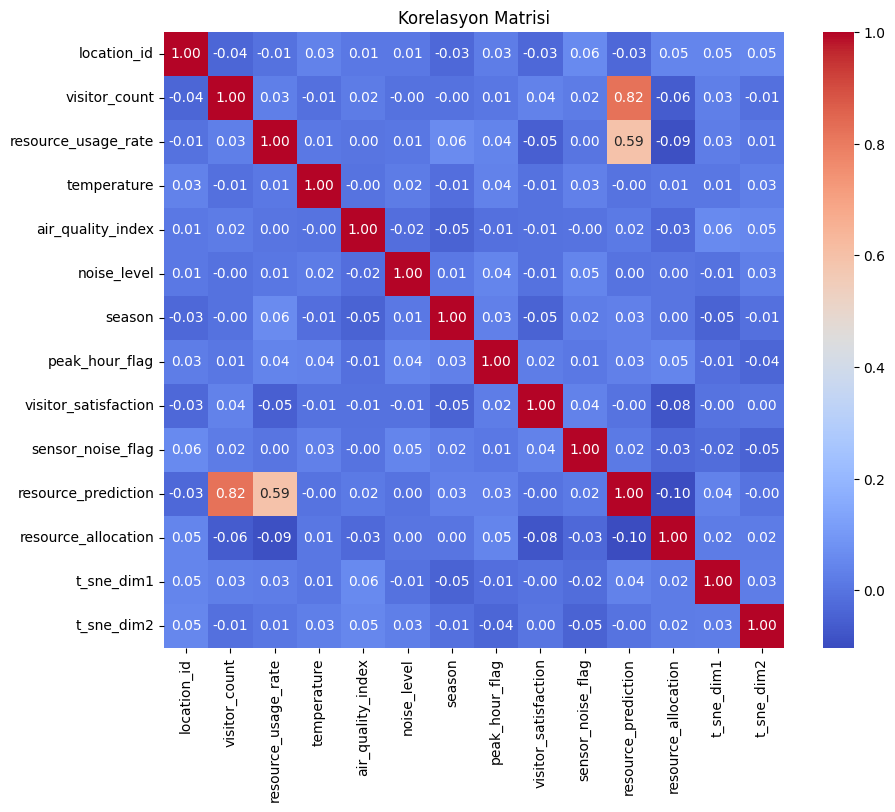

In [51]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasyon Matrisi")
plt.show()

In [50]:
encoder = LabelEncoder()
cat_cols = ['location_id','season','resource_allocation']
for col in cat_cols:
    df[col] = encoder.fit_transform(df[col])

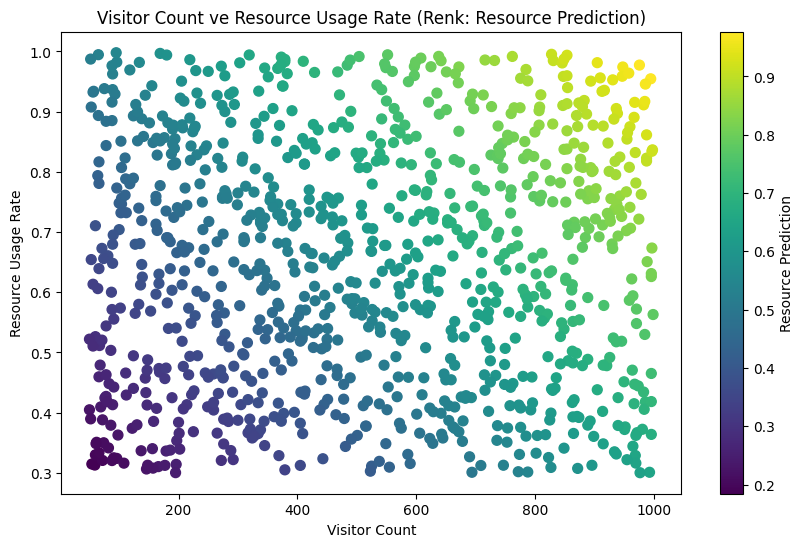

In [14]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['visitor_count'], df['resource_usage_rate'], 
                      c=df['resource_prediction'], cmap='viridis', s=50)

# Renk skalası ve etiketler
plt.colorbar(scatter, label='Resource Prediction')
plt.xlabel('Visitor Count')
plt.ylabel('Resource Usage Rate')
plt.title('Visitor Count ve Resource Usage Rate (Renk: Resource Prediction)')
plt.show()

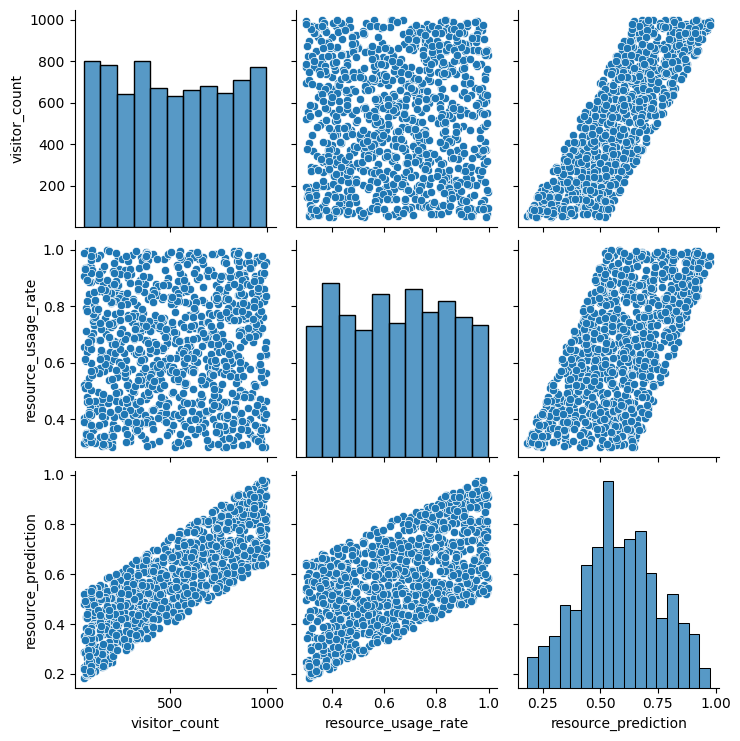

In [15]:
sns.pairplot(df[['visitor_count', 'resource_usage_rate', 'resource_prediction']])
plt.show()

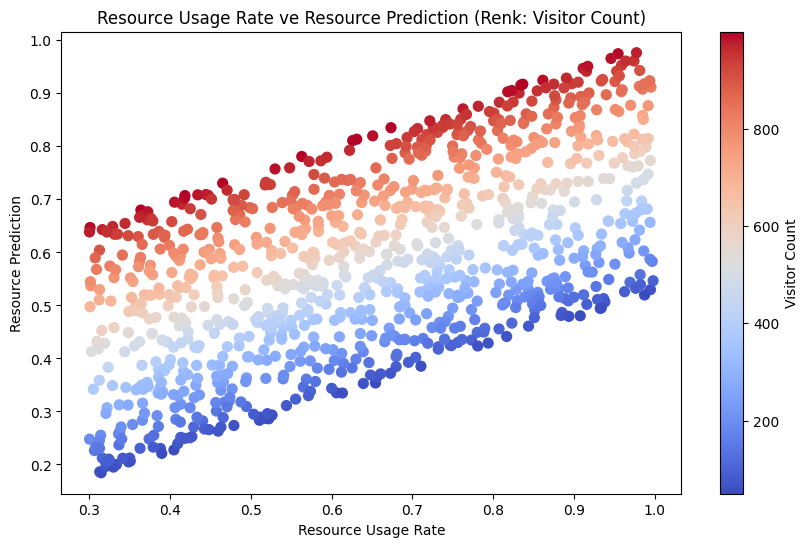

In [16]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['resource_usage_rate'], df['resource_prediction'], 
                      c=df['visitor_count'], cmap='coolwarm', s=50)

plt.colorbar(scatter, label='Visitor Count')
plt.xlabel('Resource Usage Rate')
plt.ylabel('Resource Prediction')
plt.title('Resource Usage Rate ve Resource Prediction (Renk: Visitor Count)')
plt.show()


In [17]:
df

,location_id,visitor_count,resource_usage_rate,temperature,air_quality_index,noise_level,season,peak_hour_flag,visitor_satisfaction,sensor_noise_flag,resource_prediction,resource_allocation,t_sne_dim1,t_sne_dim2
0,2,808,0.907638,19.368864,127,51.506727,2,0,5.502615,1,0.857819,0,-4.576337,0.582736
1,0,948,0.974266,17.404945,37,55.901717,0,0,4.736401,0,0.961133,0,-28.314085,20.022820
2,2,292,0.321912,16.366819,113,68.533024,3,1,2.522827,0,0.306956,1,1.329948,5.881103
3,2,592,0.811889,20.266316,52,85.301039,0,1,2.687745,1,0.701945,2,-11.921675,20.376535
4,0,89,0.936667,15.922471,145,52.258779,2,1,1.094965,1,0.512834,2,-6.068825,-4.793058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,736,0.691429,24.787529,23,65.556408,1,1,7.783125,0,0.713715,2,-20.761213,21.240263
996,1,133,0.739767,23.592172,94,82.523154,1,1,9.713010,1,0.436383,1,-31.116968,1.695131
997,2,71,0.672873,29.812523,68,51.750073,2,1,8.015976,1,0.371937,1,-7.560345,-26.537670
998,2,508,0.744562,32.259448,26,66.014272,1,0,1.202043,0,0.626281,2,-31.142550,-7.145636


In [18]:
X = df.drop('visitor_count',axis=1)

In [19]:
y = df['visitor_count']

In [20]:
X

,location_id,resource_usage_rate,temperature,air_quality_index,noise_level,season,peak_hour_flag,visitor_satisfaction,sensor_noise_flag,resource_prediction,resource_allocation,t_sne_dim1,t_sne_dim2
0,2,0.907638,19.368864,127,51.506727,2,0,5.502615,1,0.857819,0,-4.576337,0.582736
1,0,0.974266,17.404945,37,55.901717,0,0,4.736401,0,0.961133,0,-28.314085,20.022820
2,2,0.321912,16.366819,113,68.533024,3,1,2.522827,0,0.306956,1,1.329948,5.881103
3,2,0.811889,20.266316,52,85.301039,0,1,2.687745,1,0.701945,2,-11.921675,20.376535
4,0,0.936667,15.922471,145,52.258779,2,1,1.094965,1,0.512834,2,-6.068825,-4.793058
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0.691429,24.787529,23,65.556408,1,1,7.783125,0,0.713715,2,-20.761213,21.240263
996,1,0.739767,23.592172,94,82.523154,1,1,9.713010,1,0.436383,1,-31.116968,1.695131
997,2,0.672873,29.812523,68,51.750073,2,1,8.015976,1,0.371937,1,-7.560345,-26.537670
998,2,0.744562,32.259448,26,66.014272,1,0,1.202043,0,0.626281,2,-31.142550,-7.145636


In [21]:
y

0      808
1      948
2      292
3      592
4       89
      ... 
995    736
996    133
997     71
998    508
999    588
Name: visitor_count, Length: 1000, dtype: int64

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [23]:
model = LinearRegression().fit(X_train,y_train)

In [24]:
y_pred=model.predict(X_test)

In [25]:
y_pred

array([683., 866., 189., 208., 993., 970., 587., 870., 798., 714., 406.,
       969., 299., 977., 533., 131., 651.,  56., 633., 525., 713., 684.,
       525., 754., 891., 889., 889.,  88., 767., 955., 420., 552., 704.,
       637., 104., 144., 499., 180., 307.,  59., 264., 369., 898., 996.,
       759., 624., 504., 872., 310., 651., 550., 240., 999., 988., 490.,
       222., 586., 371., 267., 970., 713., 894., 856., 303.,  61., 463.,
       669., 141., 368., 793., 847., 983., 527., 236., 925., 578., 421.,
       274., 484., 715., 446., 217., 986., 691., 391., 672., 508., 426.,
       111., 190., 816., 903., 607., 351., 570., 168., 624., 425., 221.,
        89., 975., 163., 965., 469., 135., 737., 338., 765., 303., 497.,
       868., 219., 538., 684., 383., 795., 265., 531., 198., 228., 443.,
       131., 288., 880., 155., 516., 852., 275., 402., 265., 379., 367.,
       960., 736., 742., 308.,  91.,  72., 896., 378.,  50., 775., 626.,
       124., 721., 272., 959., 511., 381., 750., 93

In [26]:
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
rmse

np.float64(4.708268408319262e-12)

In [27]:
r2score = r2_score(y_test,y_pred)
r2score

1.0

In [28]:
lambdalar = 10**np.linspace(10,-2,100)
ridge_model = Ridge()
katsayilar = []

for i in lambdalar:
    ridge_model.set_params(alpha=i)
    ridge_model.fit(X_train, y_train)
    katsayilar.append(ridge_model.coef_)

Text(0.5, 1.0, 'Ridge Regresyonda Alpha Değerine Göre Katsayıların Değişimi')

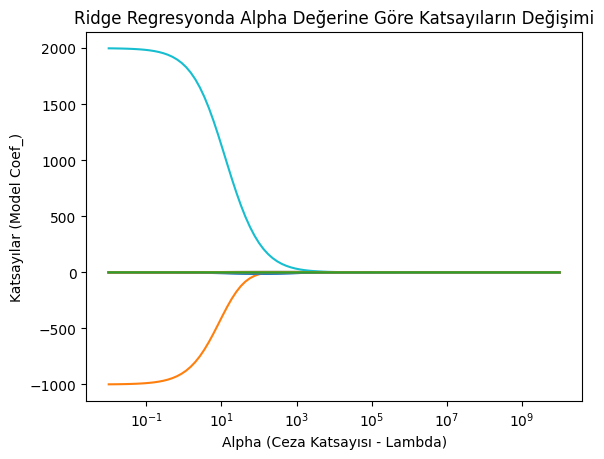

In [29]:
# Mevcut ekseni (ax) alıyoruz. Bu, grafiği çizmek için kullanılacak eksen nesnesini temsil eder.
ax = plt.gca()

# Katsayıların değişimini lambdalar (alpha değerleri) üzerinden görselleştiriyoruz.
# X ekseni: Ridge modelinin ceza katsayısı (lambdalar)
# Y ekseni: Modelin katsayıları (katsayilar)
ax.plot(lambdalar, katsayilar)

# X eksenini logaritmik ölçeğe çeviriyoruz. Bu, büyük ve küçük alpha değerlerini daha iyi karşılaştırmamızı sağlar.
ax.set_xscale('log')

# X ekseni için bir açıklama ekliyoruz. (Lambda veya alpha değerlerini temsil eder.)
ax.set_xlabel('Alpha (Ceza Katsayısı - Lambda)')

# Y ekseni için bir açıklama ekliyoruz. (Katsayılar - coef_)
ax.set_ylabel('Katsayılar (Model Coef_)')

# Başlık ekleyerek görselleştirmeyi anlamlı hale getiriyoruz.
ax.set_title('Ridge Regresyonda Alpha Değerine Göre Katsayıların Değişimi')


In [30]:
ridge_model = Ridge().fit(X_train,y_train)
y_pred = ridge_model.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

np.float64(22.675993072427325)

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
lambdalar1=np.random.randint(0,1000,100)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#ridge_model = Ridge().fit(X_train_scaled, y_train)
#y_pred = ridge_model.predict(X_test_scaled)

ridgecv = RidgeCV(alphas = lambdalar1,scoring = "neg_mean_squared_error",cv = 10,)
ridgecv.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([542,  35,  60, 727, 413, 168, 857, 451, 405, 690, 304, 877, 920,
       456, 266,  15, 776, 650,  81, 119, 722, 668, 135, 726, 195, 971,
       420, 188, 138, 848, 828, 449, 769, 516, 555, 616, 269,  23, 484,
       439, 266, 867, 161, 639, 683,  40, 781, 219, 756,   2, 762, 518,
       740, 800, 462, 749, 828, 462,  23, 709, 871, 249, 945, 273, 791,
        25, 431, 395, 215, 806, 961, 905, 470,  44, 750, 217, 215, 838,
       355, 500, 701, 367, 873, 732, 687, 525, 716, 386, 491, 592, 491,
       621, 677, 227, 999, 479, 578, 972, 677, 669], dtype=int32),
        cv=10, scoring='neg_mean_squared_error')

In [32]:
ridge_tuned = Ridge(alpha = ridge_model.alpha).fit(X_train_scaled,y_train)
y_pred = ridge_tuned.predict(X_test_scaled)
RMSE = np.sqrt(np.mean(mean_squared_error(y_test,y_pred)))
RMSE

np.float64(0.8242390534403929)

In [33]:
lasso_model = Lasso().fit(X_train,y_train)

In [34]:
lasso_model.intercept_

np.float64(1.5777334931066207)

In [35]:
lasso_model.coef_

array([-0.00000000e+00, -9.32500807e+02, -5.26853999e-02,  8.03042717e-03,
        9.29621127e-04, -0.00000000e+00, -0.00000000e+00,  1.58495762e-01,
        0.00000000e+00,  1.92173625e+03, -0.00000000e+00,  1.02436177e-02,
       -1.17798838e-02])

In [36]:
lasso_model.alpha

1.0

In [37]:
lasso = Lasso()
coefs = []
alphas=np.random.randint(0,1000,100)
for i in alphas:
    lasso.set_params(alpha = i)
    lasso.fit(X_train,y_train)
    coefs.append(lasso.coef_)

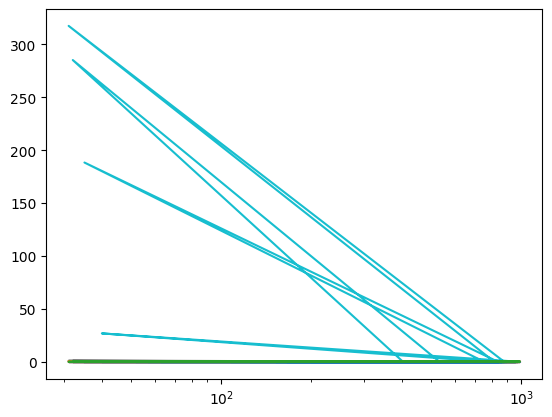

In [38]:
ax=plt.gca()
ax.plot(alphas,coefs)
ax.set_xscale("log")

In [39]:
y_pred = lasso_model.predict(X_test)

In [40]:
y_pred

array([671.04405039, 845.41291763, 196.11069422, 214.1073392 ,
       964.02677293, 956.22166062, 592.22942376, 862.58024234,
       792.64513142, 707.24470048, 403.23834848, 942.4925611 ,
       309.88796798, 948.49843423, 537.45901792, 154.1184861 ,
       655.49606413,  72.70680809, 628.30096507, 530.57332418,
       706.71753751, 677.37792925, 515.69243842, 750.39679897,
       878.33855816, 866.80681755, 878.06971509, 114.25181394,
       753.55269017, 928.19503089, 427.56240372, 560.67583007,
       694.29094645, 630.74221025, 124.98347153, 153.35038507,
       505.52900507, 202.65486617, 321.00255088,  67.84103057,
       271.60546055, 365.55888814, 887.18002938, 970.84226795,
       753.03389301, 624.52094891, 515.12868157, 848.72108932,
       312.81336414, 652.17504067, 557.452071  , 253.62130679,
       977.99549293, 976.69286818, 491.28161844, 227.53778685,
       573.88504873, 372.76530573, 270.80131589, 944.02553536,
       713.17451906, 884.42662882, 838.88590511, 320.02

In [41]:
np.sqrt(mean_squared_error(y_test,y_pred))

np.float64(12.725082416602454)

In [42]:
#bagımsız degiskenlerin bagımlı degiskenlerin yüzde kacını acıkladıgını verir(düşük)
r2_score(y_test,y_pred)

0.9979433902056195

In [43]:
lasso_cv_model = LassoCV(alphas=alphas, cv=10,max_iter = 100000).fit(X_train,y_train)

In [44]:
lasso_cv_model.alpha_

np.int32(31)

In [45]:
lasso_tuned = Lasso().set_params(alpha = lasso_cv_model.alpha_).fit(X_train,y_train)

In [46]:
y_pred = lasso_tuned.predict(X_test)

In [47]:
np.sqrt(mean_squared_error(y_test,y_pred))

np.float64(240.57015646147124)

In [48]:
r2_score(y_test,y_pred)

0.2649545503050179

In [49]:
pd.Series(lasso_tuned.coef_,index = X_train.columns)

location_id              -0.000000
resource_usage_rate      -0.000000
temperature              -0.322687
air_quality_index         0.142254
noise_level               0.000000
season                   -0.000000
peak_hour_flag            0.000000
visitor_satisfaction      0.750433
sensor_noise_flag         0.000000
resource_prediction     317.508499
resource_allocation      -0.000000
t_sne_dim1                0.305481
t_sne_dim2               -0.179349
dtype: float64